# Traitement du signal TP1

---

Davidson Lova RAZAFINDRAKOTO

---

## Exercice 1

In [1]:
import numpy as np
interval_t = [0, 100]
a = 0.01
freq_ech = 100
t_ech = (interval_t[1] - interval_t[0])*freq_ech
interval_td = np.linspace(interval_t[0], interval_t[1], t_ech)
def f(t) : 
    return 2*np.sin(a*pow((t - 100),3) + 0.2*np.pi)
# st = np.array([f(_) for _ in interval_td])
st = f(interval_td)

```python
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['text.usetex'] = True


t = np.linspace(0.0, 1.0, 100)
s = np.cos(4 * np.pi * t) + 2

fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
ax.plot(t, s)

ax.set_xlabel(r'\textbf{time (s)}')
ax.set_ylabel('\\textit{Velocity (\N{DEGREE SIGN}/sec)}', fontsize=16)
ax.set_title(r'\TeX\ is Number $\displaystyle\sum_{n=1}^\infty'
             r'\frac{-e^{i\pi}}{2^n}$!', fontsize=16, color='r')
```

Text(0, 0.5, 'f(t)')

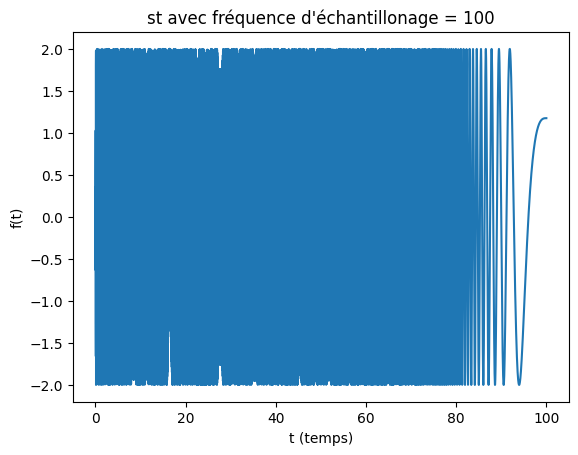

In [2]:
import pylab as plt
plt.plot(interval_td, st)
plt.title("st avec fréquence d'échantillonage = {}".format(freq_ech))
plt.xlabel("t (temps)")
plt.ylabel("f(t)")

Text(0, 0.5, 'Fréquence [Hz]')

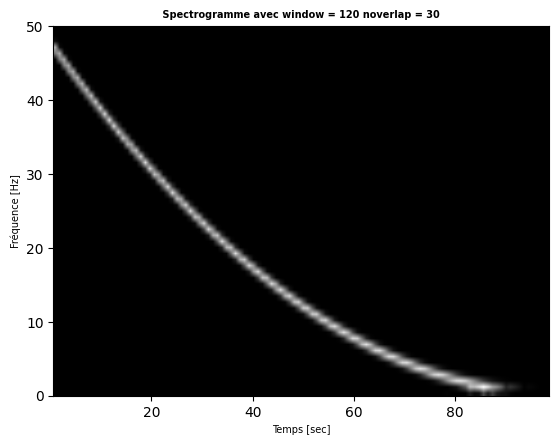

In [3]:
from scipy import signal
largeur = 120
nvp = largeur//4
f, t, ssx = signal.spectrogram(st, freq_ech, signal.windows.hamming(largeur), noverlap = nvp)
s = 7
plt.plot(figsize=(s,s))
# plt.pcolormesh(ssx.T)
plt.imshow(ssx, extent= [t[0], t[-1], f[-1],f[0]], cmap='gray', interpolation= 'bilinear', aspect= 'auto')
plt.gca().invert_yaxis()
plt.title(" Spectrogramme avec window = {} noverlap = {} ".format(largeur,nvp), fontsize = s, fontweight = "bold")
plt.xlabel("Temps [sec]",fontsize = s)
plt.ylabel("Fréquence [Hz]",fontsize = s)

2. La courbe de fréquence instantané

Text(0.5, 0.98, 'Spectogramme avec differente valeur de window')

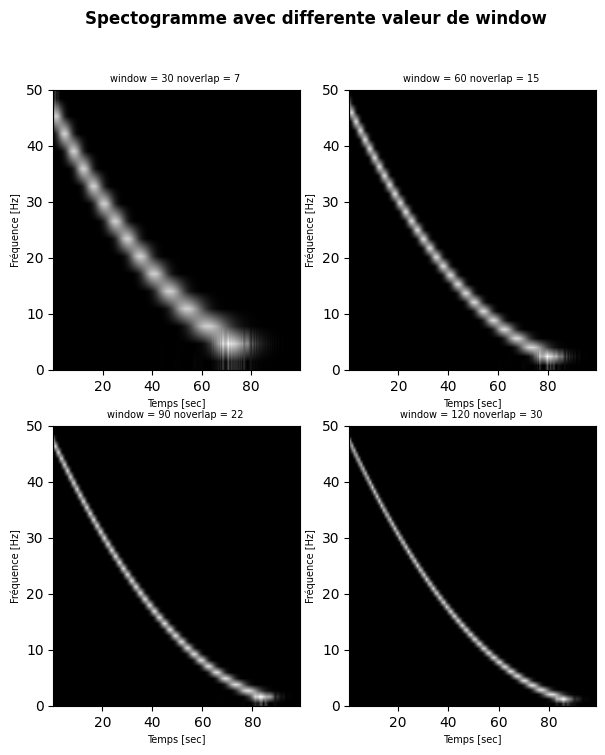

In [4]:
s = 7
plt.subplots(2,2, figsize = (s,s+1))
for i in range(1, 5) : 
    largeur = 30*i
    nvp = largeur//4
    f, t, ssx = signal.spectrogram(st, freq_ech, signal.windows.hamming(largeur), noverlap = nvp)

    plt.subplot(2,2,i)
    # plt.pcolormesh(ssx.T)
    plt.imshow(ssx, extent= [t[0], t[-1], f[-1],f[0]], cmap='gray', interpolation= 'bilinear', aspect= 'auto')
    plt.gca().invert_yaxis()
    plt.title("window = {} noverlap = {} ".format(largeur,nvp), fontsize = s)
    plt.xlabel("Temps [sec]",fontsize = s)
    plt.ylabel("Fréquence [Hz]",fontsize = s)

plt.suptitle("Spectogramme avec differente valeur de window", fontweight = "bold")

3. On voit qu'à mesure qu'on prend une fenêtre plus grand, la bande s'affine

Text(0.5, 0.98, "Spectogramme avec differente valeur de fréquence d'échantillonage")

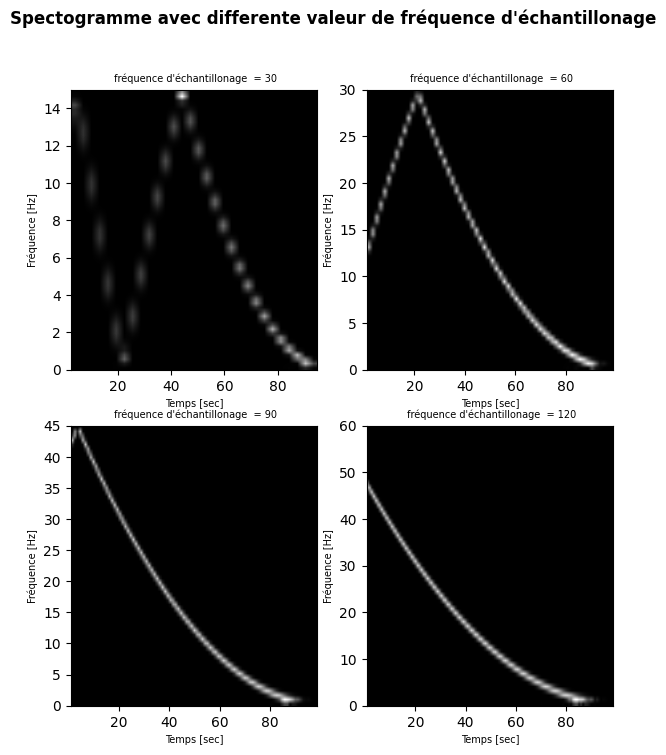

In [5]:
s = 7
fig = plt.subplots(2,2, figsize = (s,s+1))
for i in range(1, 5) : 
    freq_ech = 30*i
    t_ech = (interval_t[1] - interval_t[0])*freq_ech
    interval_td = np.linspace(interval_t[0], interval_t[1], t_ech)
    st = 2*np.sin(a*(interval_td - 100)**3 + 0.2*np.pi)
    largeur = 128
    nvp = largeur//4
    f, t, ssx = signal.spectrogram(st, freq_ech, signal.windows.hamming(largeur), noverlap = nvp)

    plt.subplot(2,2,i)
    # plt.pcolormesh(ssx.T)
    plt.imshow(ssx, extent= [t[0], t[-1], f[-1],f[0]], cmap='gray', interpolation= 'bilinear', aspect= 'auto')
    plt.gca().invert_yaxis()
    plt.title(" fréquence d'échantillonage  = {}".format(freq_ech), fontsize = s)
    plt.xlabel("Temps [sec]",fontsize = s)
    plt.ylabel("Fréquence [Hz]",fontsize = s)

plt.suptitle("Spectogramme avec differente valeur de fréquence d'échantillonage", fontweight = "bold")

C = 1, B = 2

Text(0, 0.5, 'Fréquence [Hz]')

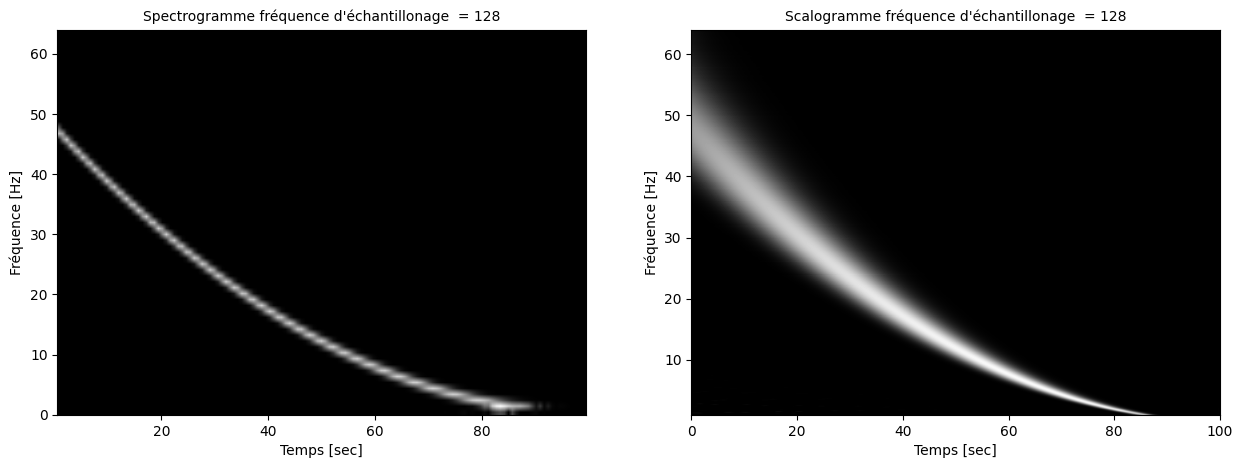

In [6]:
import pywt
size = 5
freq_ech = 128

t_ech = (interval_t[1] - interval_t[0])*freq_ech
interval_td = np.linspace(interval_t[0], interval_t[1], t_ech)
st = 2*np.sin(a*(interval_td - 100)**3 + 0.2*np.pi)
largeur = 128
nvp = largeur//4

f, t, ssx = signal.spectrogram(st, freq_ech, signal.windows.hamming(largeur), noverlap = nvp)
plt.subplots(1,2, figsize = (3*size,size))
plt.subplot(1,2,1)
plt.imshow(ssx, extent= [t[0], t[-1], f[-1],f[0]], cmap='gray', interpolation= 'bilinear', aspect= 'auto')
plt.gca().invert_yaxis()
plt.title("Spectrogramme fréquence d'échantillonage  = {}".format(freq_ech), fontsize = size*2)
plt.xlabel("Temps [sec]",fontsize = size*2)
plt.ylabel("Fréquence [Hz]",fontsize = size*2)

wt = "cmor2-1"

fc = pywt.central_frequency(wt)

fq_max = freq_ech//2
fq_min = (fc*freq_ech)/len(st)
fq_min = max(1, fq_min)

nbfq = 500
fq = np.linspace(fq_min, fq_max, nbfq)
scales = (fc*freq_ech)/fq

coeff, fq = pywt.cwt(st, scales, wt, sampling_period = 1/freq_ech)
for i in range(len(scales)) :
    coeff[i] = coeff[i]/(scales[i]/freq_ech)**0.5
coeff2 = abs(coeff)**2
plt.subplot(1,2,2)
plt.imshow(coeff2,extent = [0,100,fq[-1], fq[0]],cmap='gray', interpolation= 'bilinear', aspect= 'auto')
plt.gca().invert_yaxis()
plt.title("Scalogramme fréquence d'échantillonage  = {}".format(freq_ech), fontsize = size*2)
plt.xlabel("Temps [sec]",fontsize = size*2)
plt.ylabel("Fréquence [Hz]",fontsize = size*2)

7. 

Text(0, 0.5, 'Fréquence [Hz]')

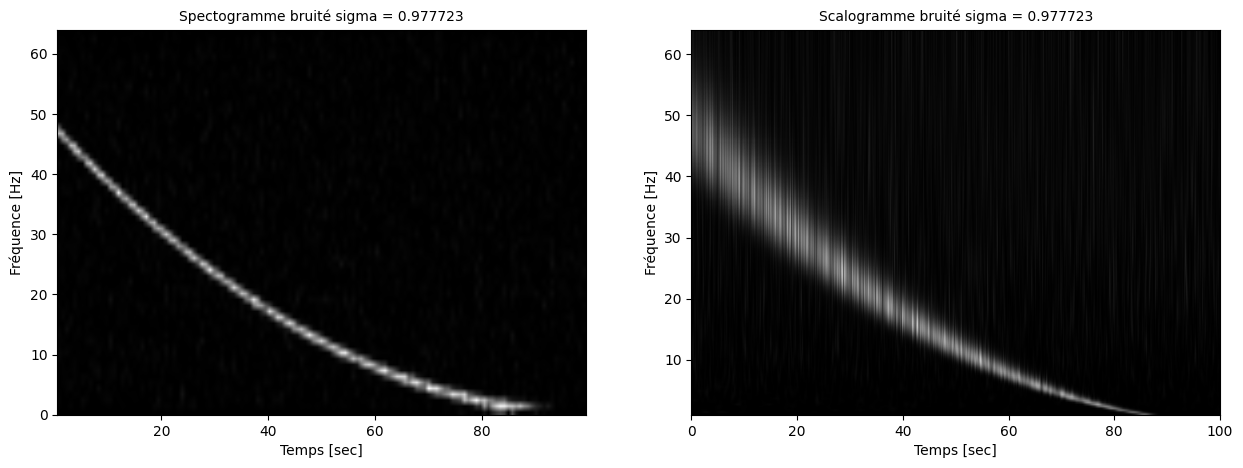

In [7]:
sigma_bruit = np.std(st)*0.7
bruit = np.random.randn(len(st))*sigma_bruit
st_b = st + bruit

size = 5
freq_ech = 128

largeur = 128
nvp = largeur//4

f, t, ssx = signal.spectrogram(st_b, freq_ech, signal.windows.hamming(largeur), noverlap = nvp)

plt.subplots(1,2, figsize = (3*size,size))
plt.subplot(1,2,1)
plt.imshow(ssx,extent= [t[0], t[-1], f[-1],f[0]], cmap='gray', interpolation= 'bilinear', aspect= 'auto')
plt.gca().invert_yaxis()
plt.title("Spectogramme bruité sigma = {:2f}".format(sigma_bruit), fontsize = size*2)
plt.xlabel("Temps [sec]",fontsize = size*2)
plt.ylabel("Fréquence [Hz]",fontsize = size*2)


wt = "cmor2-1"

fc = pywt.central_frequency(wt)

fq_max = freq_ech//2
fq_min = (fc*freq_ech)/len(st)
fq_min = max(1, fq_min)

nbfq = 200
fq = np.linspace(fq_min, fq_max, nbfq)
scales = (fc*freq_ech)/fq

coeff, fq = pywt.cwt(st_b, scales, wt, sampling_period = 1/freq_ech)
for i in range(len(scales)) :
    coeff[i] = coeff[i]/(scales[i]/freq_ech)**0.5
coeff2 = abs(coeff)**2
plt.subplot(1,2,2)
plt.imshow(coeff2,extent = [0,100,fq[-1], fq[0]],cmap='gray', interpolation= 'bilinear', aspect= 'auto')
plt.gca().invert_yaxis()
plt.title("Scalogramme bruité sigma = {:2f}".format(sigma_bruit), fontsize = size*2)
plt.xlabel("Temps [sec]",fontsize = size*2)
plt.ylabel("Fréquence [Hz]",fontsize = size*2)

## Exercice 3

In [8]:
def func_x(t, A, c, t0) :
    return A*(t0 - t)**()


In [9]:
import os
os.chdir(os.getcwd())

sig_theo = np.fromfile("theoretical_signal_float32.dat", dtype = np.float32)
sig_obs = np.fromfile("observed_signal_float32.dat", dtype = np.float32)

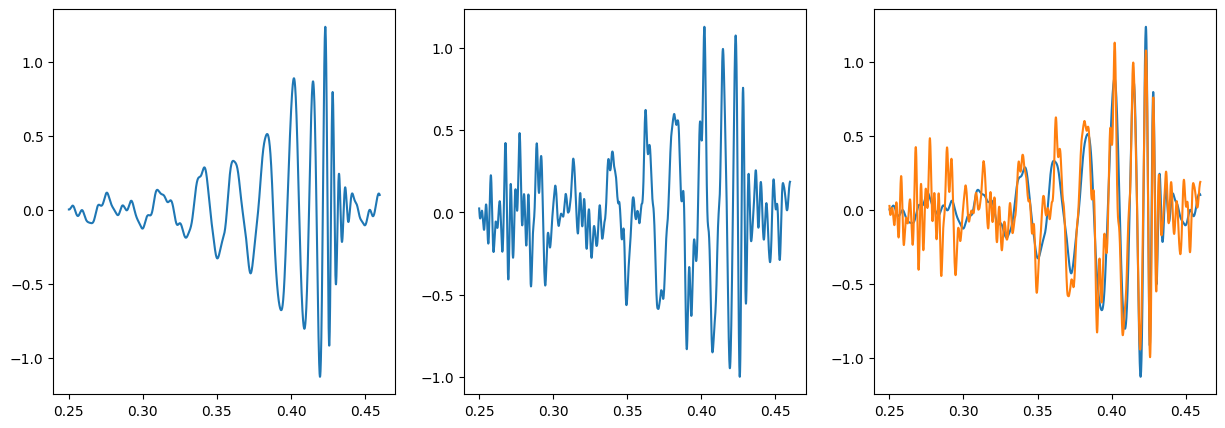

In [10]:
plt.subplots(1,3, figsize = (15,5))

plt.subplot(1,3,1)
s_theo = sig_theo[1::2]
t_theo = sig_theo[0::2]
plt.plot(t_theo, s_theo)

plt.subplot(1,3,2)
s_obs = sig_obs[1::2]
t_obs = sig_obs[0::2]
plt.plot(t_obs, s_obs)

plt.subplot(1,3,3)
plt.plot(t_theo, s_theo)
plt.plot(t_obs, s_obs)



Text(0, 0.5, 'Fréquence [Hz]')

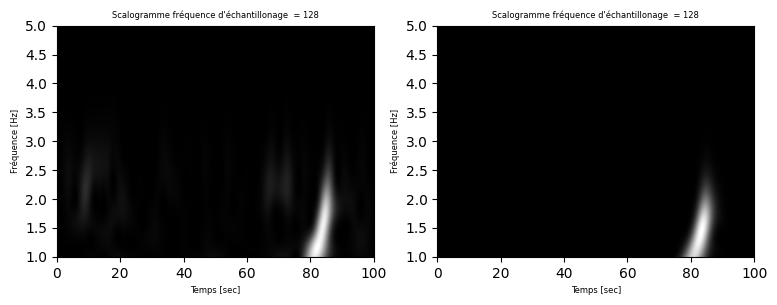

In [22]:
size = 3
freq_ech = 128
st = s_theo
largeur = freq_ech
nvp = largeur//4

wt = "cmor1.5-1"
plt.subplots(1,2, figsize = (3*size,size))

fc = pywt.central_frequency(wt)

fq_max = 5
fq_min = (fc*freq_ech)/len(st)
fq_min = max(1, fq_min)

nbfq = 1000
fq = np.linspace(fq_min, fq_max, nbfq)
scales = (fc*freq_ech)/fq

coeff, fq = pywt.cwt(s_obs, scales, wt, sampling_period = 1/freq_ech)
for i in range(len(scales)) :
    coeff[i] = coeff[i]/(scales[i]/freq_ech)**0.5
coeff2 = abs(coeff)**2

tri = np.sort(coeff2, axis = None)
prop = 0.0001
ind_min = int(len(tri) * prop)
ind_max = int(len(tri) * (1 - prop))
v_min = tri[ind_min]
v_max = tri[ind_max]

plt.subplot(1,2,1)
plt.imshow(coeff2,extent = [0,100,fq[-1], fq[0]],cmap='gray', interpolation= 'bilinear', aspect= 'auto', vmin = v_min)
plt.gca().invert_yaxis()
plt.title("Scalogramme fréquence d'échantillonage  = {}".format(freq_ech), fontsize = size*2)
plt.xlabel("Temps [sec]",fontsize = size*2)
plt.ylabel("Fréquence [Hz]",fontsize = size*2)

coeff, fq = pywt.cwt(s_theo, scales, wt, sampling_period = 1/freq_ech)
for i in range(len(scales)) :
    coeff[i] = coeff[i]/(scales[i]/freq_ech)**0.5
coeff2 = abs(coeff)**2

tri = np.sort(coeff2, axis = None)
prop = 0.0001
ind_min = int(len(tri) * prop)
ind_max = int(len(tri) * (1 - prop))
v_min = tri[ind_min]
v_max = tri[ind_max]

plt.subplot(1,2,2)
plt.imshow(coeff2,extent = [0,100,fq[-1], fq[0]],cmap='gray', interpolation= 'bilinear', aspect= 'auto',vmax= v_max, vmin = v_min)
plt.gca().invert_yaxis()
plt.title("Scalogramme fréquence d'échantillonage  = {}".format(freq_ech), fontsize = size*2)
plt.xlabel("Temps [sec]",fontsize = size*2)
plt.ylabel("Fréquence [Hz]",fontsize = size*2)